In [2]:
import numpy as np
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
def Mean_Squared_Error(pred,y,squared=True):
    rmse = (1/np.size(y))*np.sum(pred-y)
    if (squared):
        return np.sqrt(rmse)
    return rmse
def Mean_Absolute_Error(pred,y):
    return (1/np.size(y))*abs(np.sum(pred-y))

def R2(pred,y):
    mean = np.mean(y)
    sum1 = sum2 = 0
    for i in range(np.size(pred)):
        sum1 += (y[i] - pred[i])**2
    for i in range(np.size(pred)):
        sum2 += (y[i] - mean)**2
    return abs(1 - (sum1/sum2))

## Regressão Linear
Releção estatistica entre dois atributos
* Problema separado linearmente
* Prever|Previsão um target

### Estatístico

$y = a\cdot x + b$ \
$a$:coefiente linear
> $a = \frac{\sum{xy}-\sum{x} \cdot {\sum{y}} }{\sum{x^2}-(\sum{x})²}$ 

$b$:interceptor  
> $b = media_y - a \cdot media_x$

In [4]:
apart = pd.read_csv(r'dataset/PreçoApartamento.csv')
apart.head(3)

,Apartamento,Metragem (m²),Preço (USD)
0,Apartamento 1,100,150000
1,Apartamento 2,75,120000
2,Apartamento 3,120,200000


In [5]:
x = apart[' Metragem (m²)']
y = apart[' Preço (USD)']

In [6]:
xy = pd.Series(data=x*y  ,name='xy')
xx = pd.Series(data=x**2 ,name='xx')

In [7]:
# coeficiente linear
a = ((len(xy)*np.sum(xy) - np.sum(x) * np.sum(y) )) / (len(xy)*np.sum(xx) - (np.sum(x)**2))
# interceptor
b = np.mean(y) - a*np.mean(x) 

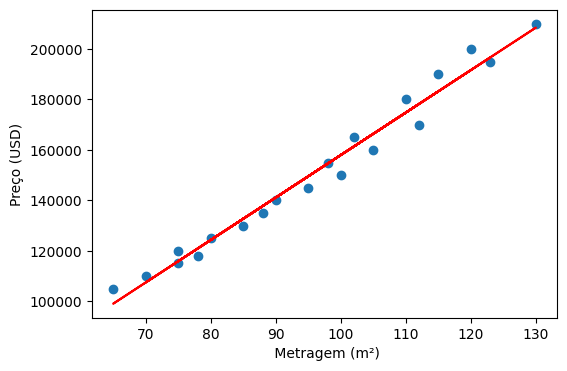

In [8]:
plt.figure(figsize=(6,4))
plt.scatter(x,y)
plt.plot(x,(a*x+b),'red')
plt.ylabel('Preço (USD)')
plt.xlabel(' Metragem (m²)')
plt.show()

Fazendo a previsão dos preços de um apartamento com 78 $m^2$ e com 32 $m²$

In [9]:
print('Preço para apartamento com 78 m²:'+str(a * 72 + b))
print('Preço para apartamento com 32 m²:'+str(a * 32 + b))

Preço para apartamento com 78 m²:110841.09816971714
Preço para apartamento com 32 m²:43515.21274067031


&nbsp;

### Machine learning

#### Predição do Modelo 
$$
\^{y} = \theta_0 + \theta_1x_1 + \theta_2x_2+...+\theta_nx_n
$$
* $\theta_n$ = são os parametro do modelo
    * $\theta_0$ : intercepto
    * $\theta_{n \geq i}$ : coeficiente linear
* $x_n$ = são as caracteristicas (atributo)
* $n$ = é quantidade de caracteristicas
* $\^{y}$ = valor previsto

#### Equação Normal
$$\^{\theta} = (X^T X)^{-1} X^T y$$

In [10]:
from typing       import Literal,_LiteralGenericAlias
from sklearn.base import RegressorMixin


class RegressaoLinear(RegressorMixin):
    theta = None
    def __init__(self,solver=Literal['normal','svd']):
    
        if (type(solver)==_LiteralGenericAlias):
            self.solver = 'normal'
        else:
            self.solver = solver

    def fit(self,X:np.array, y:np.array):
        m = np.size(X)
        X = np.c_[ np.ones((m,1)) , X]
        if (self.solver == 'normal'):
            self.theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)     
        
        return self.theta
        
    
    def predict(self,X:np.array)->Literal['Valor y']:
        return (self.theta[1] * X ) + self.theta[0] # y = theta_0 + theta_1x1.....

In [11]:
salario = pd.read_csv(r'dataset/Salário.csv')

X = salario['Experiencia'].values.reshape(-1,1)
Y = salario['Salario'].values.reshape(-1,1)

xtrain , xtest ,ytrain , ytest = train_test_split(X,Y,random_state=42,train_size=45)

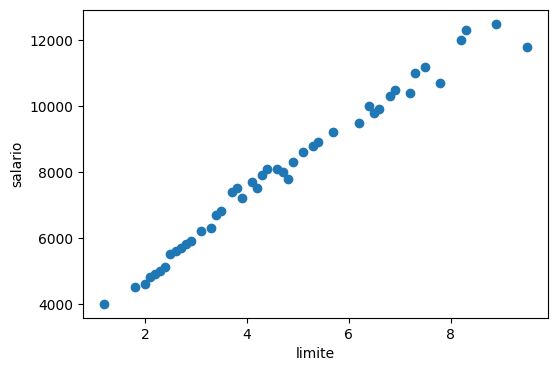

In [12]:
plt.figure(figsize=(6,4))
plt.scatter(xtrain,ytrain); plt.ylabel('salario');plt.xlabel('limite')
plt.show()

In [13]:
reg = RegressaoLinear('normal')
reg.fit(xtrain,ytrain)

array([[2847.01740378],
       [1085.98791782]])

array[0] = intercepto | coeficiente linear\
array[1] = coeficiente angular\
Função do modelo \
Vou querer valores de experiencia 3.5, 4

In [14]:
pred = reg.predict(xtest)

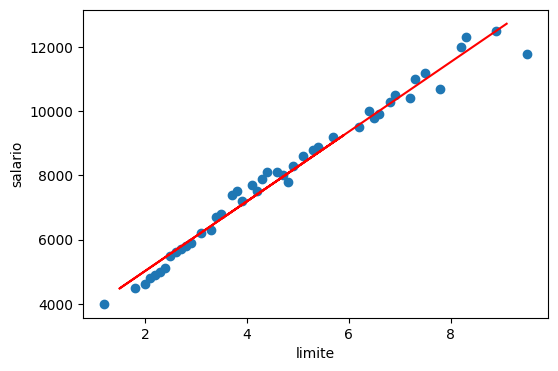

In [15]:
plt.figure(figsize=(6,4))
plt.scatter(xtrain,ytrain); 
plt.plot(xtest,pred,'red')
plt.ylabel('salario');plt.xlabel('limite')
plt.show()

In [16]:
Mean_Absolute_Error(pred,ytest),Mean_Squared_Error(pred,ytest),R2(pred,ytest)

(107.21189190341178, 10.354317548897743, array([0.94623829]))